In [1]:
import numpy as np
from exp_family import *
from projectors import *

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

In [2]:
def sgd(objective, sample_dist, zero_point, projector, 
        C = 1e-3, problem = "KL", max_iter = 10**5):
    cur_theta = zero_point
    estim = []
    thetas = [cur_theta]
    dim = len(zero_point[0])
    for i in range(max_iter):
        f_theta = sample_dist(*cur_theta)
        cur_x = f_theta.sample()
        # estimation part
        x = cur_x
        tmp = objective(x)/f_theta.pdf(x)
        if i == 0:
            cur_estim = tmp
        else:
            #print(estim)
            cur_estim = tmp + estim[i - 1] * i
            cur_estim = cur_estim/(i + 1)
        estim.append(cur_estim)
        # gradient part
        if problem == "KL":
            grad = tuple((g_A - t)*tmp for g_A, t in zip(f_theta.grad_A(),f_theta.T(x)))
        elif problem == "Var":
            grad = tuple((g_A - t)*(tmp**2) for g_A, t in zip(f_theta.grad_A(),f_theta.T(x)))
        else:
            raise ValueError('problem should be equal to either "KL" or "Var"')
        # step part
        step_size = C
        cur_theta = tuple(theta_elem - step_size*g for theta_elem, g in zip(cur_theta, grad))
        cur_theta = projector(*cur_theta)
        thetas.append(cur_theta)
    return estim, thetas

In [9]:
obj = lambda x: x.dot(x) <= 4
l_min = 1e-1
l_max = 1
zero_point = (np.array([0,0]), np.eye(2))
projector = CoordProjector(BoxProjector(-1, 1), EigenBoxProjector(l_min, l_max))

### Estimations using KL-divergence for strong-convex objective

In [4]:
estim0, thetas0 = sgd(obj, GaussianDistribution, zero_point, projector, max_iter=10**6)

In [5]:
thetas0[::10000]

[(array([0, 0]), array([[ 1.,  0.],
         [ 0.,  1.]])),
 (array([ 0.04127553, -0.11516569]), array([[ 0.98831106,  0.03298535],
         [ 0.03298535,  0.90691773]])),
 (array([ 0.02038947,  0.12821813]), array([[ 0.99771663,  0.01012865],
         [ 0.01012865,  0.95507098]])),
 (array([-0.19050946, -0.00090378]), array([[ 0.87183203,  0.04639012],
         [ 0.04639012,  0.97230044]])),
 (array([ 0.05386193, -0.13378879]), array([[ 0.98281569,  0.01033685],
         [ 0.01033685,  0.95977622]])),
 (array([-0.07282331,  0.04932474]), array([[ 0.89773072,  0.01918335],
         [ 0.01918335,  0.9868671 ]])),
 (array([-0.04586908, -0.07211503]), array([[ 0.97286848, -0.00834995],
         [-0.00834995,  0.87469363]])),
 (array([-0.02631934, -0.1608667 ]), array([[ 0.86404418,  0.03018643],
         [ 0.03018643,  0.92146264]])),
 (array([ 0.10253961,  0.05256586]), array([[ 0.89098374,  0.05899546],
         [ 0.05899546,  0.91050981]])),
 (array([ 0.03099156,  0.12864293]), array([

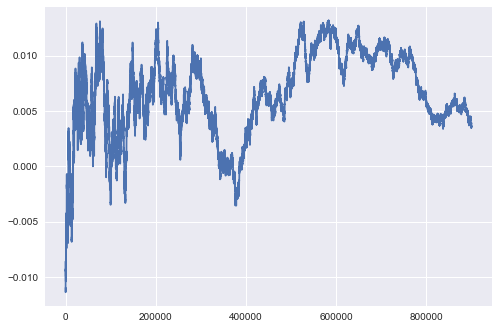

In [10]:
true_value = np.pi*4
plt.plot(np.array(estim0)[10**5:] - true_value)

### Estimations using KL-divergence for convex functions with the small coefficient of strong-convexity

In [7]:
#obj = lambda x: x.dot(x) <= 4
l_min = 1e-1
l_max = 10
zero_point = (np.array([0,0]), np.eye(2))
projector = CoordProjector(BoxProjector(-1, 1), EigenBoxProjector(l_min, l_max))
estim1, thetas1 = sgd(obj, GaussianDistribution, zero_point, projector, max_iter=10**6)

In [8]:
thetas1[::10000]

[(array([0, 0]), array([[ 1.,  0.],
         [ 0.,  1.]])),
 (array([-0.05276639,  0.09543875]), array([[ 0.98628209, -0.07069086],
         [-0.07069086,  1.03127989]])),
 (array([-0.01921214, -0.12201779]), array([[ 0.9854465 , -0.04170363],
         [-0.04170363,  1.21455994]])),
 (array([ 0.03878987, -0.16927552]), array([[ 1.05951377, -0.02014521],
         [-0.02014521,  0.9536784 ]])),
 (array([-0.14553995,  0.12001312]), array([[ 0.91075808, -0.04909642],
         [-0.04909642,  1.18783985]])),
 (array([-0.10377992, -0.01591192]), array([[ 1.00815608,  0.05573405],
         [ 0.05573405,  1.00325362]])),
 (array([-0.15819897, -0.20897214]),
  array([[  1.01824233e+00,   8.10888654e-04],
         [  8.10888654e-04,   9.49935057e-01]])),
 (array([-0.0851002 , -0.09600906]), array([[ 1.20258081, -0.01864353],
         [-0.01864353,  0.86114264]])),
 (array([-0.12290456,  0.09363581]), array([[ 1.01760058, -0.00195133],
         [-0.00195133,  0.99542447]])),
 (array([ 0.02119777, 

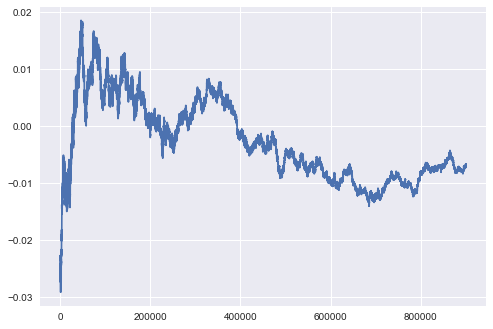

In [9]:
true_value = np.pi*4
plt.plot(np.array(estim1)[10**5:] - true_value)

### Estimations using variance for strong convex functions

In [10]:
estim2, thetas2 = sgd(obj, GaussianDistribution, zero_point, projector, max_iter=10**6, problem='Var')

In [11]:
thetas2[::10000]

[(array([0, 0]), array([[ 1.,  0.],
         [ 0.,  1.]])), (array([ 1.,  1.]), array([[ 0.53105268, -0.44960093],
         [-0.44960093,  0.56894732]])), (array([ 1.,  1.]),
  array([[ 0.53105268, -0.44960093],
         [-0.44960093,  0.56894732]])), (array([ 1.,  1.]),
  array([[ 0.48538999, -0.44533756],
         [-0.44533756,  0.61461001]])), (array([-1.,  1.]),
  array([[ 0.28776788,  0.36569703],
         [ 0.36569703,  0.81223212]])), (array([ 1.,  1.]),
  array([[ 0.82346893, -0.357372  ],
         [-0.357372  ,  0.27653107]])), (array([ 1.,  1.]),
  array([[ 0.54974698, -0.44999993],
         [-0.44999993,  0.55025302]])), (array([ 1.,  1.]),
  array([[ 0.54974698, -0.44999993],
         [-0.44999993,  0.55025302]])), (array([ 1.,  1.]),
  array([[ 0.54974698, -0.44999993],
         [-0.44999993,  0.55025302]])), (array([ 1.,  1.]),
  array([[ 0.21942272, -0.28754726],
         [-0.28754726,  0.894074  ]])), (array([ 1.,  1.]),
  array([[ 0.61243781, -0.4456473 ],
         [-0

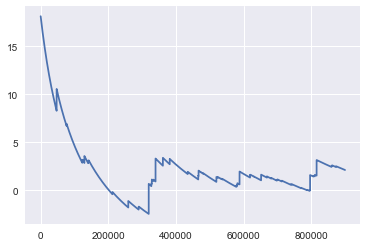

In [24]:
true_value = np.pi*4
plt.plot(np.array(estim2)[10**5:] - true_value)

### Estimations using variance for functions with bad coefficient of strong convexity

In [21]:
obj = lambda x: x.dot(x) <= 4
l_min = 1e-1
l_max = 10
zero_point = (np.array([0,0]), np.eye(2))
projector = CoordProjector(BoxProjector(-1, 1), EigenBoxProjector(l_min, l_max))

estim3, thetas3 = sgd(obj, GaussianDistribution, zero_point, projector, 
                      max_iter=10**6, problem='Var')

In [22]:
thetas3[::10000]

[(array([0, 0]), array([[ 1.,  0.],
         [ 0.,  1.]])), (array([-1.,  1.]), array([[ 1.38464836,  1.80417199],
         [ 1.80417199,  2.63379575]])), (array([-1.,  1.]),
  array([[ 1.38464836,  1.80417199],
         [ 1.80417199,  2.63379575]])), (array([-1.,  1.]),
  array([[ 1.38464836,  1.80417199],
         [ 1.80417199,  2.63379575]])), (array([-1.,  1.]),
  array([[ 1.38464836,  1.80417199],
         [ 1.80417199,  2.63379575]])), (array([-1.,  1.]),
  array([[ 1.38464836,  1.80417199],
         [ 1.80417199,  2.63379575]])), (array([-1.,  1.]),
  array([[ 1.38464836,  1.80417199],
         [ 1.80417199,  2.63379575]])), (array([-1.,  1.]),
  array([[ 1.38464836,  1.80417199],
         [ 1.80417199,  2.63379575]])), (array([-1.,  1.]),
  array([[ 2.49781829,  4.24132863],
         [ 4.24132863,  7.60218171]])), (array([-1.,  1.]),
  array([[ 2.49781829,  4.24132863],
         [ 4.24132863,  7.60218171]])), (array([-1.,  1.]),
  array([[ 7.64194371,  4.21714688],
         [ 4

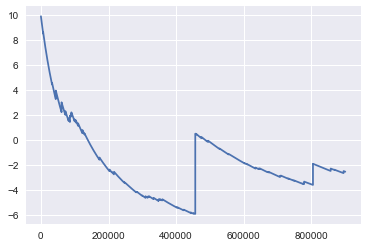

In [23]:
true_value = np.pi*4
plt.plot(np.array(estim3)[10**5:] - true_value)

### Ball3D

In [44]:
obj = lambda x: x.dot(x) <= 4
l_min = 1e-1
l_max = 5
zero_point = (np.array([0,0,0]), np.eye(3))
projector = CoordProjector(BoxProjector(-1, 1), EigenBoxProjector(l_min, l_max))

In [45]:
estim0, thetas0 = sgd(obj, GaussianDistribution, zero_point, projector, max_iter=10**6, C=1e-4)

In [46]:
estim0[-1]

33.531994617976657

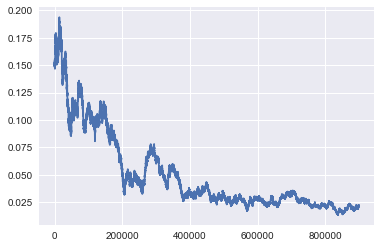

In [47]:
true_value = np.pi*4/3*8
plt.plot(np.array(estim0)[10**5:] - true_value)

### let's increase l_max

In [48]:
obj = lambda x: x.dot(x) <= 4
l_min = 1e-1
l_max = 15
zero_point = (np.array([0,0,0]), np.eye(3))
projector = CoordProjector(BoxProjector(-1, 1), EigenBoxProjector(l_min, l_max))

In [49]:
estim1, thetas1 = sgd(obj, GaussianDistribution, zero_point, projector, max_iter=10**6, C=1e-4)

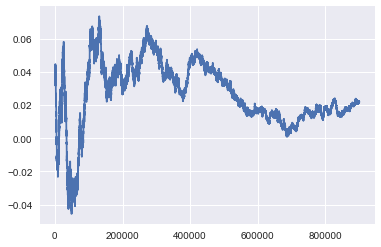

In [50]:
true_value = np.pi*4/3*8
plt.plot(np.array(estim1)[10**5:] - true_value)

### Estimations using variance without acceleration

In [51]:
obj = lambda x: x.dot(x) <= 4
l_min = 1e-1
l_max = 5
zero_point = (np.array([0,0,0]), np.eye(3))
projector = CoordProjector(BoxProjector(-1, 1), EigenBoxProjector(l_min, l_max))

In [52]:
estim2, thetas2 = sgd(obj, GaussianDistribution, zero_point, projector, max_iter=10**6, problem='Var', C=1e-4)

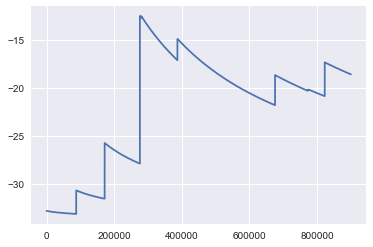

In [53]:
true_value = np.pi*4/3*8
plt.plot(np.array(estim2)[10**5:] - true_value)

### Estimations using variance with acceleration

In [61]:
obj = lambda x: x.dot(x) <= 4
l_min = 1e-1
l_max = 1000
zero_point = (np.array([0,0,0]), np.eye(3))
projector = CoordProjector(BoxProjector(-1, 1), EigenBoxProjector(l_min, l_max))

estim3, thetas3 = sgd(obj, GaussianDistribution, zero_point, projector,
                      C=1e-5, max_iter=10**6, problem='Var')

In [62]:
thetas3[::10000]

[(array([0, 0, 0]), array([[ 1.,  0.,  0.],
         [ 0.,  1.,  0.],
         [ 0.,  0.,  1.]])),
 (array([-0.18252879, -0.8872841 , -0.26366851]),
  array([[ 864.75747868,  -97.13893347, -255.48861826],
         [ -97.13893347,  918.52188589, -113.66683875],
         [-255.48861826, -113.66683875,  100.57337836]])),
 (array([-0.99999889, -0.99999999, -1.        ]),
  array([[ 880.395935  ,  -56.76268678, -123.73636185],
         [ -56.76268678,  938.23215119,   23.16472321],
         [-123.73636185,   23.16472321,  679.45517072]])),
 (array([-0.94509192, -0.99956704, -0.85427146]),
  array([[ 880.39521347,  -56.75997756, -123.73980058],
         [ -56.75997756,  938.2248049 ,   23.1673326 ],
         [-123.73980058,   23.1673326 ,  679.44055276]])),
 (array([-0.94491476, -0.99936322, -0.8542034 ]),
  array([[ 880.39520083,  -56.75998548, -123.73981072],
         [ -56.75998548,  938.22479467,   23.16732729],
         [-123.73981072,   23.16732729,  679.44053934]])),
 (array([-0.94471

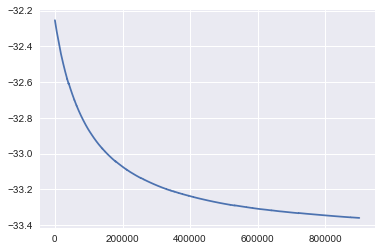

In [63]:
true_value = np.pi*4/3*8
plt.plot(np.array(estim3)[10**5:] - true_value)